In [1]:
from matplotlib import pyplot as plt

from loki.libloki.configs import PulsarSearchConfig
from loki.search import ffa_search
from pyloki.simulation.pulse import PulseSignalConfig

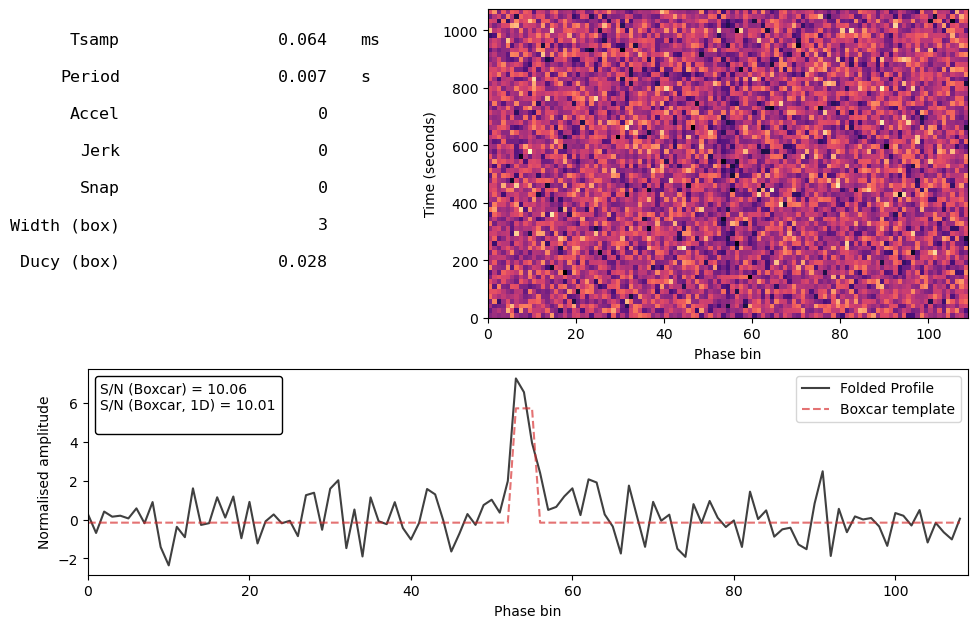

In [2]:
pulsar_period = 0.007  # (s)
dt = 64e-6
nsamps = 2**24
cfg = PulseSignalConfig(period=pulsar_period, dt=dt, snr=10, ducy=0.05, nsamps=nsamps, os=1)
tim_data = cfg.generate(shape="gaussian")
fig = tim_data.plot_fold(cfg.freq, cfg.fold_bins)
plt.show()

In [9]:
tol_bins = 1  # cfg.tol_bins
fold_bins = 64 # cfg.fold_bins
param_limits = [(1 / 0.0075, 1 / 0.0065)]
bseg_brute = cfg.nsamps // 16384
search_cfg = PulsarSearchConfig(nsamps=cfg.nsamps, tsamp=cfg.dt, nbins=fold_bins, tol_bins=tol_bins, param_limits=param_limits,
                                bseg_brute=bseg_brute, ducy_max=0.2, wtsp=1.5, nthreads=8, use_fft_shifts=False)
ffa_plan, pgram = ffa_search(tim_data, search_cfg)

[2025-07-01 19:20:03.083] [info] PulsarSearchConfigClass: nsamps=16777216, tsamp=6.4e-05, nbins=64, tol_bins=1, ducy_max=0.2, wtsp=1.5, prune_poly_order=3, prune_n_derivs=3, bseg_brute=1024, bseg_ffa=16777216, use_fft_shifts=false, branch_max=16, nthreads=8
[2025-07-01 19:20:04.079] [info] FFA Memory Usage: 0.67 GB (721730560 bytes) [optimized: 1 internal buffers]
[2025-07-01 19:20:04.132] [info] FFA::execute started
[2025-07-01 19:20:04.132] [info] FFA::initialize started
[2025-07-01 19:20:04.295] [info] FFA::initialize took 162 ms
[2025-07-01 19:20:04.563] [info] FFA::execute took 431 ms


Computing FFA... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  100% :00s<00m:00s] 


In [10]:
print(pgram.get_indices_summary(true_values={"freq": cfg.freq},))
print(pgram.get_summary())

True param indices: (654471,)
Best param indices: (np.int64(654470), np.int64(3))
Best S/N: 8.51
Best Period: 0.007000000381987604
Best freq: 142.8571350614779
Best width: 4


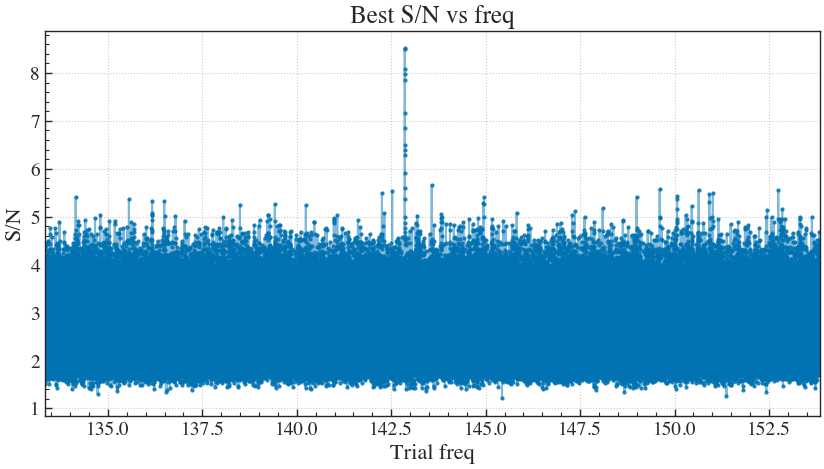

In [11]:
fig = pgram.plot_1d("freq", figsize=(10, 5))
plt.show()